# Simulating a quantum system

MagPy uses a two-term Magnus expansion to evolve solutions to the Liouville-von Neumann equation,

$$\frac{\partial \rho(t)}{\partial t} = -i\,\big[H(t),\,\rho(t)\big],$$

given a Hamiltonian $H$, initial density matrix $\rho_0$, and discretised time interval $[t_0, t_f]$.

In [20]:
import magpy as mp
from magpy import X, Y
import numpy as np

H = np.sin*X() + 4*Y()
rho0 = Y()
tlist = mp.timegrid(0, 10, 0.5**6)

The method `evolve` calculates the density matrix at each point in time and returns a tensor of states.

In [21]:
states = mp.evolve(H, rho0, tlist)

## Visualising the states

Using the Frobenius inner product,

$$\langle A, B\rangle_\text{F} := \text{Tr}\big(A^\dagger B\big),$$

we can measure the magnitude of a single spin component, giving us a scalar value to plot over time. MagPy provides a batch function which will calculate the inner product of all state matrices with the given spin component matrix.

Note: the double parentheses indicate that we are calling the `Y` function and then calling it's matrix representation.

For the $Y$ component of the system's spin,

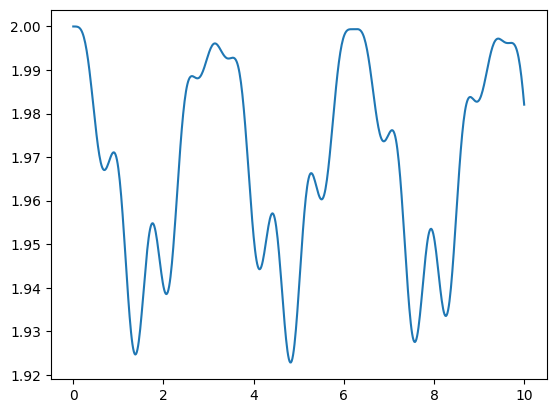

In [22]:
import matplotlib.pyplot as plt

y_component = mp.frobenius(states, Y()())
plt.plot(tlist, y_component)

## Utilising GPUs

MagPy supports calculations on GPUs via PyTorch and CUDA. The `set_device` function is used to specify the device, where the default value is `cpu`.

In [23]:
import torch

mp.set_device('cuda')     # Default CUDA device
mp.set_device('cuda:0')   # First available GPU
mp.set_device('cpu')      # Return to CPU

When using the solvers on a GPU, time-dependent Hamiltonians must contain only `torch` functions.

In [26]:
H = torch.sin*X() + 4*Y()

## Multiple qubits

MagPy provides support for multi-qubit systems. This is done by specifying the position of the qubit in each call of `X`, `Y`, or `Z`. The default value is 1, so this parameter can be omitted in single-qubit systems, as above.

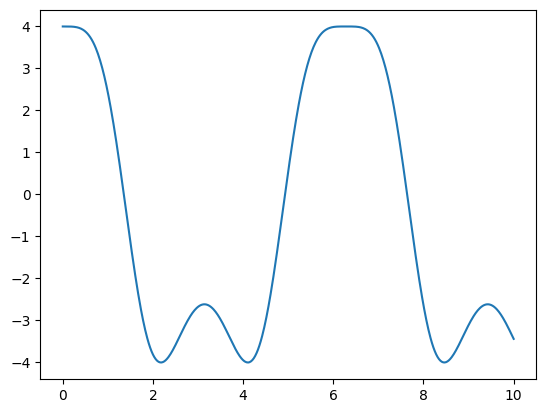

In [27]:
H = np.sin*X(1) + Y(2)
rho0 = Y(1) + X(2)
tlist = mp.timegrid(0, 10, 0.5**6)

states = mp.evolve(H, rho0, tlist)

y_component = mp.frobenius(states, Y(1)(2))  # Y in first position of two-qubit system.
plt.plot(tlist, y_component)